In [1]:
import h2o

In [2]:
import tensorflow as tf

In [3]:
import numpy as np 
import matplotlib as mp
%matplotlib inline
import matplotlib.pyplot as plt
sess = tf.Session()

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [4]:
def getActivations(layer,stimuli):
    units = layer.eval(session=sess,feed_dict={x:np.reshape(stimuli,[1,784],order='F'),keep_prob:1.0})
    plotNNFilter(units)

In [5]:
def plotNNFilter(units):
    filters = units.shape[3]
    plt.figure(1, figsize=(20,20))
    for i in xrange(0,filters):
        plt.subplot(7,6,i+1)
        plt.title('Filter ' + str(i))
        plt.imshow(units[0,:,:,i], interpolation="nearest", cmap="gray")

In [9]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


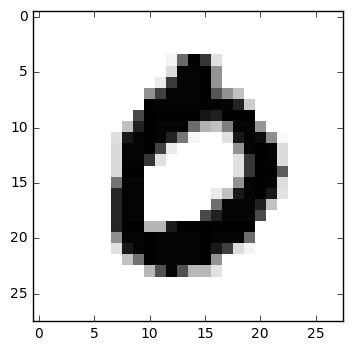

In [13]:
imageWidth = imageHeight = 28
testImageNumber = 3   # Change here to see another

imageToUse = mnist.test.images[testImageNumber]
plt.imshow(np.reshape(imageToUse,[imageWidth,imageHeight]), interpolation="nearest", cmap="gray_r")

In [14]:
inputVectorSize = imageWidth*imageHeight

numberOfPossibleDigits = 10     # handwritten digits between 0 and 9
outputVectorSize = numberOfPossibleDigits

x = tf.placeholder(tf.float32, [None, inputVectorSize],name="x-in")
y_ = tf.placeholder(tf.float32, [None, outputVectorSize],name="y-in")

def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')    
# overlapping strides (2: non-overlapping)

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],strides=[1, 2, 2, 1], padding='SAME')

In [15]:
outputFeatures1 = 4
outputFeatures2 = 4
outputFeatures3 = 16

# Input
x_image = tf.reshape(x, [-1,imageWidth,imageHeight,1])

# Individual neuron calculation: y = conv(x,weight) + bias

# Layer 1: convolution
W_conv1 = weight_variable([5, 5, 1, outputFeatures1])
b_conv1 = bias_variable([outputFeatures1])
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

# Layer 2: convolution
W_conv2 = weight_variable([5, 5, outputFeatures1, outputFeatures2])
b_conv2 = bias_variable([outputFeatures2])
h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

# Layer 3: convolution
W_conv3 = weight_variable([5, 5, outputFeatures2, outputFeatures3])
b_conv3 = bias_variable([outputFeatures3])
h_conv3 = tf.nn.relu(conv2d(h_pool2, W_conv3) + b_conv3)

# Layer 4: Densely connected layer
W_fc1 = weight_variable([7 * 7 * outputFeatures3, 10])
b_fc1 = bias_variable([10])
h_conv3_flat = tf.reshape(h_conv3, [-1, 7*7*outputFeatures3])
keep_prob = tf.placeholder("float")
h_conv3_drop = tf.nn.dropout(h_conv3_flat, keep_prob)

# Output
y_conv = tf.nn.softmax(tf.matmul(h_conv3_drop, W_fc1) + b_fc1)

In [17]:
cross_entropy = -tf.reduce_sum(y_*tf.log(y_conv))
correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
train_step = tf.train.GradientDescentOptimizer(0.0001).minimize(cross_entropy)

In [18]:
sess.run(tf.initialize_all_variables())

iterations = 0
trainingImageBatchSize = 50

for iterations in range(0,1000):
    batch = mnist.train.next_batch(trainingImageBatchSize)
    train_step.run(session=sess, feed_dict={x:batch[0],y_:batch[1], keep_prob:0.5})

if iterations%100 == 0:
        trainAccuracy = accuracy.eval(session=sess, feed_dict={x:batch[0],y_:batch[1], keep_prob:1.0})
        print("step %d, training accuracy %g"%(iterations, trainAccuracy))

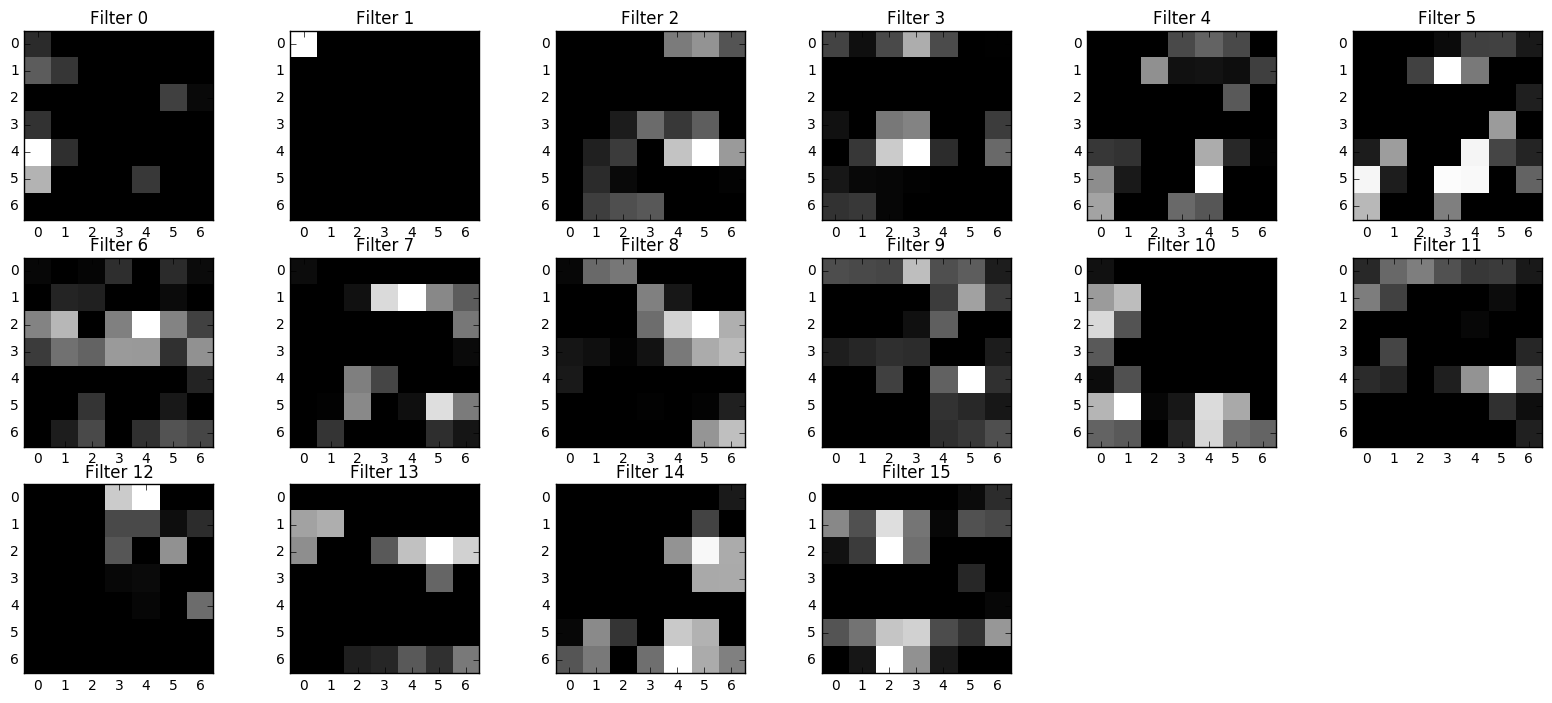

In [26]:
testImageNumber = 1   # Change here to use another

imageToUse = mnist.test.images[testImageNumber]
#plt.imshow(np.reshape(imageToUse,[imageWidth,imageHeight]), interpolation="nearest", cmap="gray_r")

try: 
    xrange 
except NameError: 
    xrange = range


getActivations(h_conv1,imageToUse)
getActivations(h_conv2,imageToUse)
getActivations(h_conv3,imageToUse)



In [27]:
testAccuracy = accuracy.eval(session=sess, feed_dict={x:mnist.test.images,y_:mnist.test.labels, keep_prob:1.0})
print("test accuracy %g"%(testAccuracy))

test accuracy 0.8813
